In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import datetime
import os

In [99]:
tf_folder = './logs/comparison/tf/'
vip_folder = './logs/comparison/vip/'

In [100]:
df_list = []
for dataset in os.listdir(tf_folder):
    model_path = os.path.join(tf_folder, dataset)
    
    for submodel in os.listdir(model_path):
        submodel_path = os.path.join(model_path, submodel)
        
        df = pd.read_csv(os.path.join(submodel_path, 'prediction.csv'))
        df['submodel'] = [submodel]
        df['dataset'] = [dataset]
        df_list.append(df)

In [101]:
df_tf = pd.concat(df_list)
df_tf['submodel'] = df_tf['submodel'].apply(lambda x: x[1:]).astype(int)

In [102]:
selected = df_tf[df_tf['dataset'] == 'fake'].sort_values('submodel')
selected = selected.iloc[1:]

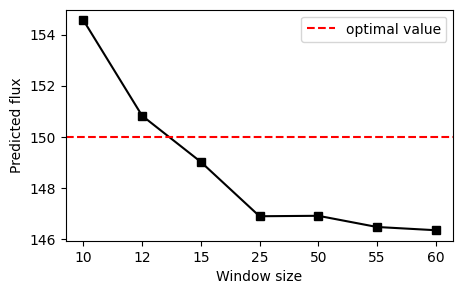

In [103]:
plt.figure(figsize=(5,3))
plt.plot(range(selected.shape[0]), selected['optimal_flux'].values, marker='s', color='k')
plt.xticks(range(selected.shape[0]), selected['submodel'])
plt.axhline(y=150, color='r', linestyle='--', label='optimal value')
plt.xlabel('Window size')
plt.ylabel('Predicted flux')
plt.legend()
plt.show()

In [104]:
df_list = []
for dataset in os.listdir(vip_folder):
    model_path = os.path.join(vip_folder, dataset)
    
    for submodel in ['stddev', 'sum']:
        df = pd.read_csv(os.path.join(model_path, submodel, 'prediction.csv'))
        df['submodel'] = [submodel]
        df['dataset'] = [dataset]
        df_list.append(df)
df_vip = pd.concat(df_list)

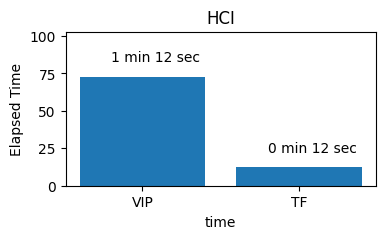

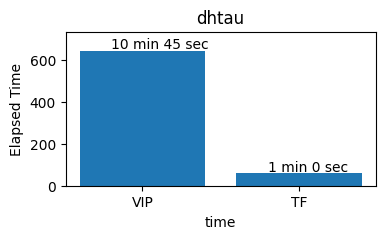

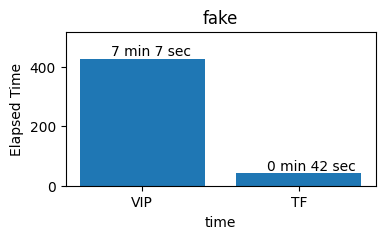

In [142]:
for dataset in ['foo', 'dhtau', 'fake']:    
    avip = df_vip[(df_vip['dataset'] == dataset)& (df_vip['submodel'] == 'stddev')]
    atf = df_tf[(df_tf['dataset'] == dataset) &  (df_tf['submodel'] == 15)]
    
    vip_flux = avip['elapsed'].values[0]
    tf_flux = atf['elapsed'].values[0]
    y_values = [vip_flux, tf_flux]
    
    plt.figure(figsize=(4,2), dpi=100)
    x_range = range(2)
    plt.bar(x_range, y_values)
    plt.xticks(x_range, ['VIP', 'TF'])
    
    for i in x_range:
        m, s = divmod(y_values[i], 60)
        plt.text(i-0.2, y_values[i]+10, '{:.0f} min {:.0f} sec'.format(m, int(s)) )
        
    plt.xlabel('time')
    plt.ylabel('Elapsed Time')
    if dataset == 'foo':
        plt.title('HCI')
        plt.ylim(0, y_values[0]+30)
    else:
        plt.ylim(0, y_values[0]+90)
        plt.title(dataset)
    plt.show()

In [152]:
atf = df_tf[(df_tf['dataset'] == 'fake') &  (df_tf['submodel'] == 12)]
avip = df_vip[(df_vip['dataset'] == 'fake') & (df_vip['submodel'] == 'stddev')]

Text(0, 0.5, 'Predicted Flux')

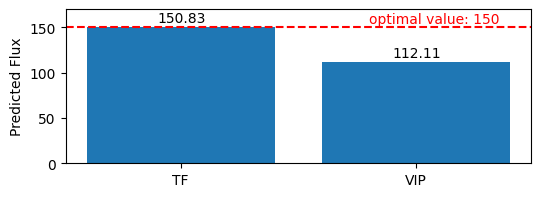

In [183]:
values = [atf['optimal_flux'].values[0], 
          avip['optimal_flux'].values[0]]

plt.figure(figsize=(6, 2))
plt.bar(range(2), values)
plt.xticks(range(2), ['TF', 'VIP'])
for i in range(2):
    plt.text(i-0.1, values[i]+5, '{:.2f}'.format(values[i]))

plt.axhline(y=150, color='r', linestyle='--', label='optimal value')
plt.text(.8, 155, 'optimal value: 150', color='red')

plt.ylim(0, 170)
plt.ylabel('Predicted Flux')